<a href="https://colab.research.google.com/github/thiyagi9/PythonPractises/blob/main/Data_Aggregation_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
print('The sklearn version is {}.'.format(sklearn.__version__))

The sklearn version is 0.22.2.post1.


In [ ]:
!pip install -U scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')

  print("Mounting your Google Drive ...")
  from google.colab import drive
  drive.flush_and_unmount()
  drive.mount('/content/drive',force_remount=True)
  #path for folder in Drive
  path = "/content/drive/My Drive/Colab Notebooks/"

  import sys
  sys.path.insert(0,path[:-1])

else:
  print('Not running on CoLab')
  path = ''

Running on CoLab
Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


## Feature Engineering

In [4]:
details = pd.read_csv(path+'Details_ready.csv')
sales = pd.read_csv(path+'Sales_ready.csv')

In [5]:
display(sales.head(),details.head())

,Unnamed: 0,CUSTOMER_ID,membership_m,CASH,CHECK,CREDIT CARD,DEBIT CARD,GIFT CARD,MEMBER_GET_MEMBER,PHONE,STORE,WEB,HOUR,fri,mon,sat,sun,thu,tue,wed,weekday,weekend,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,0-8,12-14,15-17,18-20,21-23,9-11,EARNED_POINTS,USED_POINTS
0,0,AA00312188,185.0,1,0,0,0,0,0,0,0,1,14,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,290.0,NaN
1,1,AA00312188,185.0,1,0,0,0,0,0,0,0,1,14,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,155.0,NaN
2,2,AA00312188,185.0,1,0,0,0,0,0,0,0,1,14,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,295.0,NaN
3,3,AA00312188,185.0,1,0,0,0,0,0,0,0,1,14,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,115.0,NaN
4,4,AA00312188,185.0,1,0,0,0,0,0,0,0,1,14,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,290.0,NaN


,Unnamed: 0,CUSTOMER_ID,QUANTITY,LIST_PRICE,SPECIAL,membership_m,0.0,1.0,10.0,11.0,12.0,13.0,15.0,16.0,2.0,3.0,4.0,6.0,7.0,9.0,MEMBER_GET_MEMBER,PHONE,STORE,WEB,fri,mon,sat,sun,thu,tue,wed,weekday,weekend,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,TOTAL_PURCHASE,TOTAL_RETURNED,LIST_PRICE_RETURNED
0,0,BF00404312,1.0,6.85,0,216.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,6.85,NaN,NaN
1,1,BF00404312,1.0,6.25,0,216.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,6.25,NaN,NaN
2,2,BF00404312,1.0,4.95,0,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4.95,NaN,NaN
3,3,BF00404312,1.0,5.25,0,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5.25,NaN,NaN
4,4,BF00404312,1.0,5.95,0,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5.95,NaN,NaN


In [ ]:
#mask = sales['TOTAL_POINTS']>=0

#sales['EARNED_POINTS'] = sales['TOTAL_POINTS'].mask(~mask)
#sales['USED_POINTS'] = sales['TOTAL_POINTS'].mask(mask)
#sales = sales.drop(['TOTAL_POINTS'], axis=1)
#sales.head()

KeyError: ignored

In [ ]:
mask2 = details['SALE_PER_TRANSACTION']>=0

details['TOTAL_PURCHASE'] = details['SALE_PER_TRANSACTION'].mask(~mask2)
details['TOTAL_RETURNED'] = details['SALE_PER_TRANSACTION'].mask(mask2)

details.head()

,CUSTOMER_ID,QUANTITY,LIST_PRICE,SPECIAL,SALE_PER_TRANSACTION,membership_m,0.0,1.0,10.0,11.0,12.0,13.0,15.0,16.0,2.0,3.0,4.0,6.0,7.0,9.0,MEMBER_GET_MEMBER,PHONE,STORE,WEB,fri,mon,sat,sun,thu,tue,wed,weekday,weekend,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,TOTAL_PURCHASE,TOTAL_RETURNED
0,BF00404312,1.0,6.85,0,6.85,216.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,6.85,NaN
1,BF00404312,1.0,6.25,0,6.25,216.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,6.25,NaN
2,BF00404312,1.0,4.95,0,4.95,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4.95,NaN
3,BF00404312,1.0,5.25,0,5.25,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5.25,NaN
4,BF00404312,1.0,5.95,0,5.95,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5.95,NaN


In [ ]:
mask3 = details['LIST_PRICE']>=0

details['LIST_PRICE'] = details['LIST_PRICE'].mask(~mask3)
details['LIST_PRICE_RETURNED'] = details['LIST_PRICE'].mask(mask3)

details.head()

,CUSTOMER_ID,QUANTITY,LIST_PRICE,SPECIAL,SALE_PER_TRANSACTION,membership_m,0.0,1.0,10.0,11.0,12.0,13.0,15.0,16.0,2.0,3.0,4.0,6.0,7.0,9.0,MEMBER_GET_MEMBER,PHONE,STORE,WEB,fri,mon,sat,sun,thu,tue,wed,weekday,weekend,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,TOTAL_PURCHASE,TOTAL_RETURNED,LIST_PRICE_RETURNED
0,BF00404312,1.0,6.85,0,6.85,216.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,6.85,NaN,NaN
1,BF00404312,1.0,6.25,0,6.25,216.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,6.25,NaN,NaN
2,BF00404312,1.0,4.95,0,4.95,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4.95,NaN,NaN
3,BF00404312,1.0,5.25,0,5.25,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5.25,NaN,NaN
4,BF00404312,1.0,5.95,0,5.95,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5.95,NaN,NaN


In [ ]:
details = details.drop(['SALE_PER_TRANSACTION'], axis=1)

In [ ]:
details.describe()

,QUANTITY,LIST_PRICE,SPECIAL,membership_m,0.0,1.0,10.0,11.0,12.0,13.0,15.0,16.0,2.0,3.0,4.0,6.0,7.0,9.0,MEMBER_GET_MEMBER,PHONE,STORE,WEB,fri,mon,sat,sun,thu,tue,wed,weekday,weekend,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,TOTAL_PURCHASE,TOTAL_RETURNED,LIST_PRICE_RETURNED
count,1.046302e+06,1.034487e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.046302e+06,1.034665e+06,11637.000000,0.0
mean,1.138159e+00,8.368239e+00,3.614635e-03,1.380192e+02,2.580517e-05,1.718271e-01,1.528039e-01,4.302008e-02,2.783135e-02,2.038513e-02,2.039564e-03,2.529767e-02,6.325134e-03,2.735185e-01,5.548111e-02,1.622476e-02,1.328651e-01,7.235483e-02,7.942258e-04,7.388976e-02,2.599966e-01,6.653194e-01,2.025209e-01,3.937678e-04,1.904135e-01,3.054950e-02,2.031316e-01,1.875606e-01,1.854302e-01,7.790370e-01,2.209630e-01,8.892270e-03,1.310310e-01,1.032580e-01,7.448136e-03,1.112384e-01,6.673026e-02,9.668337e-02,6.265877e-03,1.243953e-01,1.115041e-01,1.232512e-01,1.093021e-01,1.063451e+01,-8.701921,NaN
std,1.303817e+00,5.669804e+00,6.001311e-02,6.780720e+01,5.079816e-03,3.772302e-01,3.597985e-01,2.029024e-01,1.644895e-01,1.413138e-01,4.511548e-02,1.570278e-01,7.927883e-02,4.457649e-01,2.289170e-01,1.263390e-01,3.394290e-01,2.590746e-01,2.817083e-02,2.615915e-01,4.386326e-01,4.718789e-01,4.018785e-01,1.983968e-02,3.926275e-01,1.720937e-01,4.023298e-01,3.903610e-01,3.886464e-01,4.148958e-01,4.148958e-01,9.387868e-02,3.374344e-01,3.042956e-01,8.598063e-02,3.144273e-01,2.495544e-01,2.955263e-01,7.890895e-02,3.300321e-01,3.147556e-01,3.287255e-01,3.120180e-01,4.230848e+01,81.022990,NaN
min,-4.800000e+01,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8464.000000,NaN
25%,1.000000e+00,5.250000e+00,0.000000e+00,7.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.250000e+00,-5.000000,NaN
50%,1.000000e+00,7.250000e+00,0.000000e+00,1.340000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.250000e+00,-5.000000,NaN
75%,1.000000e+00,9.950000e+00,0.000000e+00,2.030000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+

In [ ]:
sales.to_csv('Sales_ready.csv',index=True)

In [ ]:
!cp Sales_ready.csv '/content/drive/Shareddrives/Información de Respaldo/Master in Data Science/Fieldwork Laboratory/Group 1/'

In [ ]:
details.to_csv('Details_ready.csv',index=True)

In [ ]:
!cp Details_ready.csv '/content/drive/Shareddrives/Información de Respaldo/Master in Data Science/Fieldwork Laboratory/Group 1/'

## Aggregate the Data

In [ ]:
details = pd.read_csv(path+'Details_dummyrdc.csv')
sales = pd.read_csv(path+'Sales_dummyrdc.csv')

In [ ]:
display(sales.head(),details.head())

,CUSTOMER_ID,TOTAL_POINTS,membership_m,CASH,CHECK,CREDIT CARD,DEBIT CARD,GIFT CARD,MEMBER_GET_MEMBER,PHONE,STORE,WEB,HOUR,Outlet,0,10,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,...,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,8.0,80.0,81.0,82.0,9.0,fri,mon,sat,sun,thu,tue,wed,weekday,weekend,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,0-8,12-14,15-17,18-20,21-23,9-11
0,AA00312188,290.0,185.0,1,0,0,0,0,0,0,0,1,14,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,AA00312188,155.0,185.0,1,0,0,0,0,0,0,0,1,14,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,AA00312188,295.0,185.0,1,0,0,0,0,0,0,0,1,14,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,AA00312188,115.0,185.0,1,0,0,0,0,0,0,0,1,14,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,AA00312188,290.0,185.0,1,0,0,0,0,0,0,0,1,14,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


,CUSTOMER_ID,QUANTITY,LIST_PRICE,SPECIAL,SALE_PER_TRANSACTION,membership_m,0.0,1.0,10.0,11.0,12.0,13.0,15.0,16.0,2.0,3.0,4.0,6.0,7.0,9.0,R,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,...,70,71,72,73,74,75,76,77,78,79,8,80,81,82,9,MEMBER_GET_MEMBER,PHONE,STORE,WEB,fri,mon,sat,sun,thu,tue,wed,weekday,weekend,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,BF00404312,1.0,6.85,0,6.85,216.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,BF00404312,1.0,6.25,0,6.25,216.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,BF00404312,1.0,4.95,0,4.95,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,BF00404312,1.0,5.25,0,5.25,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,BF00404312,1.0,5.95,0,5.95,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


Sum only the columns we want and then merge. 

In [ ]:
reg_code_list = [11., 42.,  6., 21.,  3., 48., 25., 13., 23., 54., 36., 39., 17.,
       41., 46., 71., 66., 43., 33., 53., 35., 78., 28., 38., 64., 30.,
       47., 56.,  9., 16., 40.,  1., 62., 26., 63., 12.,  2., 10., 31.,
       14., 15.,  7., 37., 24., 81., 20., 27., 61., 32., 34.,  4., 18.,
       58., 49., 51., 69., 74., 50., 22., 55., 19., 60., 29., 57., 45.,
       59.,  8., 65., 70., 52., 75.,  5., 77., 44., 68., 79., 82., 76.,
       67., 72., 73., 80.]

In [ ]:
len(reg_code_list)

82

In [ ]:
reg_code_list = [ str(x) for x in reg_code_list ]

In [ ]:
outlet_id_list = [ 64,   6,  25,  79,  91,  67,  85,   7, 123, 107,   8,   9,  51,
        10,  20,  14, 133,  17,  29,  16,  88,  19,  21,  18, 103,  31,
        78,  42,  36, 122,  43,  94,  60,  93, 106,  56, 105,  98,  92,
       125, 124, 111, 114, 136, 135,  35,   0,  33,   5, 108, 116,  34,
        95, 119, 100,  87,  76,  48,  39,  49,  37,  22,  99,  96, 127,
        70,  80,  82,  32,  75,  81, 126, 120, 113, 110, 121,  30,  73,
        84,  89,  69,  74, 118,  97, 109, 129, 102, 131,  23,  83,  77,
       101,  44, 132,  13, 104,  38,  27,  15,  54,  72,  63, 128,  59,
        68,  62, 134,  53, 130,  90,   3, 112, 117,  41,  66,  26,  65,
        61,  46,  24, 115,  50, 137,  57, 140,  47,   4, 139,  86, 141]

In [ ]:
len(outlet_id_list)

130

In [ ]:
#Missing codes in outlet
missing_out=['1','2','11','12','28','40','45','52','55','58','71','138']

10

In [ ]:
outlet_id_list = [ str(x) for x in outlet_id_list ]

In [ ]:
print(list(sales.columns))

['CUSTOMER_ID', 'TOTAL_POINTS', 'membership_m', 'CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD', 'GIFT CARD', 'MEMBER_GET_MEMBER', 'PHONE', 'STORE', 'WEB', 'HOUR', 'Outlet', '0', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '139', '14', '140', '141', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '41', '42', '43', '44', '46', '47', '48', '49', '5', '50', '51', '53', '54', '56', '57', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', 'R', '1.0', '10.

In [ ]:
sales_aggregated = sales.groupby('CUSTOMER_ID').agg(
total_points_avg = ('TOTAL_POINTS', 'mean'),
members_month = ('membership_m', 'max'),
cash_cnt = ('CASH', 'sum'),
check_cnt = ('CHECK', 'sum'),
credit_cnt = ('CREDIT CARD', 'sum'),
debit_cnt = ('DEBIT CARD', 'sum'),
gift_cnt = ('GIFT CARD', 'sum'),
referral_cnt = ('MEMBER_GET_MEMBER', 'sum'),
phone_cnt = ('PHONE', 'sum'),
store_cnt = ('STORE', 'sum'),
web_cnt = ('WEB', 'sum'),

mon_cnt = ('mon', 'sum'),
tue_cnt = ('tue', 'sum'),
wed_cnt = ('wed', 'sum'),
thu_cnt = ('thu', 'sum'),
fri_cnt = ('fri', 'sum'),
sat_cnt = ('sat', 'sum'),
sun_cnt = ('sun', 'sum'),
week_cnt = ('weekday', 'sum'),
weekend_cnt = ('weekend', 'sum'),

jan_cnt = ('jan', 'sum'),
feb_cnt = ('feb', 'sum'),
mar_cnt = ('mar', 'sum'),
apr_cnt = ('apr', 'sum'),
may_cnt = ('may', 'sum'),
jun_cnt = ('jun', 'sum'),
jul_cnt = ('jul', 'sum'),
aug_cnt = ('aug', 'sum'),
sep_cnt = ('sep', 'sum'),
oct_cnt = ('oct', 'sum'),
nov_cnt = ('nov', 'sum'),
dec_cnt = ('dec', 'sum'),

h0_8_cnt = ('0-8', 'sum'),
h9_11_cnt = ('9-11', 'sum'),
h12_14_cnt = ('12-14', 'sum'),
h15_17_cnt = ('15-17', 'sum'),
h18_20_cnt = ('18-20', 'sum'),
h21_23_cnt = ('21-23', 'sum'),

reg1 = ('1.0', 'sum'),
reg10 = ('10.0', 'sum'),
reg11 = ('11.0', 'sum'),
reg12 = ('12.0', 'sum'),
reg13 = ('13.0', 'sum'),
reg14 = ('14.0', 'sum'),
reg15 = ('15.0', 'sum'),
reg16 = ('16.0', 'sum'),
reg17 = ('17.0', 'sum'),
reg18 = ('18.0', 'sum'),
reg19 = ('19.0', 'sum'),
reg2 = ('2.0', 'sum'),
reg20 = ('20.0', 'sum'),
reg21 = ('21.0', 'sum'),
reg22 = ('22.0', 'sum'),
reg23 = ('23.0', 'sum'),
reg24 = ('24.0', 'sum'),
reg25 = ('25.0', 'sum'),
reg26 = ('26.0', 'sum'),
reg27 = ('27.0', 'sum'),
reg28 = ('28.0', 'sum'),
reg29 = ('29.0', 'sum'),
reg3 = ('3.0', 'sum'),
reg30 = ('30.0', 'sum'),
reg31 = ('31.0', 'sum'),
reg32 = ('32.0', 'sum'),
reg33 = ('33.0', 'sum'),
reg34 = ('34.0', 'sum'),
reg35 = ('35.0', 'sum'),
reg36 = ('36.0', 'sum'),
reg37 = ('37.0', 'sum'),
reg38 = ('38.0', 'sum'),
reg39 = ('39.0', 'sum'),
reg4 = ('4.0', 'sum'),
reg41 = ('41.0', 'sum'),
reg42 = ('42.0', 'sum'),
reg43 = ('43.0', 'sum'),
reg44 = ('44.0', 'sum'),
reg45 = ('45.0', 'sum'),
reg46 = ('46.0', 'sum'),
reg47 = ('47.0', 'sum'),
reg48 = ('48.0', 'sum'),
reg49 = ('49.0', 'sum'),
reg5 = ('5.0', 'sum'),
reg51 = ('51.0', 'sum'),
reg52 = ('52.0', 'sum'),
reg53 = ('53.0', 'sum'),
reg54 = ('54.0', 'sum'),
reg55 = ('55.0', 'sum'),
reg56 = ('56.0', 'sum'),
reg57 = ('57.0', 'sum'),
reg58 = ('58.0', 'sum'),
reg59 = ('59.0', 'sum'),
reg6 = ('6.0', 'sum'),
reg61 = ('61.0', 'sum'),
reg62 = ('62.0', 'sum'),
reg63 = ('63.0', 'sum'),
reg64 = ('64.0', 'sum'),
reg65 = ('65.0', 'sum'),
reg66 = ('66.0', 'sum'),
reg67 = ('67.0', 'sum'),
reg68 = ('68.0', 'sum'),
reg69 = ('69.0', 'sum'),
reg7 = ('7.0', 'sum'),
reg71 = ('71.0', 'sum'),
reg72 = ('72.0', 'sum'),
reg73 = ('73.0', 'sum'),
reg74 = ('74.0', 'sum'),
reg75 = ('75.0', 'sum'),
reg76 = ('76.0', 'sum'),
reg77 = ('77.0', 'sum'),
reg78 = ('78.0', 'sum'),
reg79 = ('79.0', 'sum'),
reg8 = ('8.0', 'sum'),
reg81 = ('81.0', 'sum'),
reg82 = ('82.0', 'sum'),
reg9 = ('9.0', 'sum'),

out0 = ('0', 'sum'),
out10 = ('10', 'sum'),
out100 = ('100', 'sum'),
out101 = ('101', 'sum'),
out102 = ('102', 'sum'),
out103 = ('103', 'sum'),
out104 = ('104', 'sum'),
out105 = ('105', 'sum'),
out106 = ('106', 'sum'),
out107 = ('107', 'sum'),
out108 = ('108', 'sum'),
out109 = ('109', 'sum'),
out110 = ('110', 'sum'),
out111 = ('111', 'sum'),
out112 = ('112', 'sum'),
out113 = ('113', 'sum'),
out114 = ('114', 'sum'),
out115 = ('115', 'sum'),
out116 = ('116', 'sum'),
out117 = ('117', 'sum'),
out118 = ('118', 'sum'),
out119 = ('119', 'sum'),
out120 = ('120', 'sum'),
out121 = ('121', 'sum'),
out122 = ('122', 'sum'),
out123 = ('123', 'sum'),
out124 = ('124', 'sum'),
out125 = ('125', 'sum'),
out126 = ('126', 'sum'),
out127 = ('127', 'sum'),
out128 = ('128', 'sum'),
out129 = ('129', 'sum'),
out13 = ('13', 'sum'),
out130 = ('130', 'sum'),
out131 = ('131', 'sum'),
out132 = ('132', 'sum'),
out133 = ('133', 'sum'),
out134 = ('134', 'sum'),
out135 = ('135', 'sum'),
out136 = ('136', 'sum'),
out137 = ('137', 'sum'),
out139 = ('139', 'sum'),
out14 = ('14', 'sum'),
out140 = ('140', 'sum'),
out141 = ('141', 'sum'),
out15 = ('15', 'sum'),
out16 = ('16', 'sum'),
out17 = ('17', 'sum'),
out18 = ('18', 'sum'),
out19 = ('19', 'sum'),
out21 = ('21', 'sum'),
out22 = ('22', 'sum'),
out23 = ('23', 'sum'),
out24 = ('24', 'sum'),
out25 = ('25', 'sum'),
out26 = ('26', 'sum'),
out27 = ('27', 'sum'),
out29 = ('29', 'sum'),
out3 = ('3', 'sum'),
out30 = ('30', 'sum'),
out31 = ('31', 'sum'),
out32 = ('32', 'sum'),
out33 = ('33', 'sum'),
out34 = ('34', 'sum'),
out35 = ('35', 'sum'),
out36 = ('36', 'sum'),
out37 = ('37', 'sum'),
out38 = ('38', 'sum'),
out39 = ('39', 'sum'),
out4 = ('4', 'sum'),
out41 = ('41', 'sum'),
out42 = ('42', 'sum'),
out43 = ('43', 'sum'),
out44 = ('44', 'sum'),
out46 = ('46', 'sum'),
out47 = ('47', 'sum'),
out48 = ('48', 'sum'),
out49 = ('49', 'sum'),
out5 = ('5', 'sum'),
out50 = ('50', 'sum'),
out51 = ('51', 'sum'),
out53 = ('53', 'sum'),
out54 = ('54', 'sum'),
out56 = ('56', 'sum'),
out57 = ('57', 'sum'),
out59 = ('59', 'sum'),
out6 = ('6', 'sum'),
out60 = ('60', 'sum'),
out61 = ('61', 'sum'),
out62 = ('62', 'sum'),
out63 = ('63', 'sum'),
out64 = ('64', 'sum'),
out65 = ('65', 'sum'),
out66 = ('66', 'sum'),
out67 = ('67', 'sum'),
out68 = ('68', 'sum'),
out69 = ('69', 'sum'),
out7 = ('7', 'sum'),
out70 = ('70', 'sum'),
out72 = ('72', 'sum'),
out73 = ('73', 'sum'),
out74 = ('74', 'sum'),
out75 = ('75', 'sum'),
out76 = ('76', 'sum'),
out77 = ('77', 'sum'),
out78 = ('78', 'sum'),
out79 = ('79', 'sum'),
out8 = ('8', 'sum'),
out80 = ('80', 'sum'),
out81 = ('81', 'sum'),
out82 = ('82', 'sum'),
out83 = ('83', 'sum'),
out84 = ('84', 'sum'),
out85 = ('85', 'sum'),
out86 = ('86', 'sum'),
out87 = ('87', 'sum'),
out88 = ('88', 'sum'),
out89 = ('89', 'sum'),
out9 = ('9', 'sum'),
out90 = ('90', 'sum'),
out91 = ('91', 'sum'),
out92 = ('92', 'sum'),
out93 = ('93', 'sum'),
out94 = ('94', 'sum'),
out95 = ('95', 'sum'),
out96 = ('96', 'sum'),
out97 = ('97', 'sum'),
out98 = ('98', 'sum'),
out99 = ('99', 'sum')
)

In [ ]:
sales_aggregated.head()

,total_points_avg,members_month,cash_cnt,check_cnt,credit_cnt,debit_cnt,gift_cont,referral_cont,phone_cont,store_cont,web_cont,mon_cont,tue_cont,wed_cont,thu_cont,fri_cont,sat_cont,sun_cont,week_cont,weekend_cont,jan_cont,feb_cont,mar_cont,apr_cont,may_cont,jun_cont,jul_cont,aug_cont,sep_cont,oct_cont,nov_cont,dec_cont,h0_8_cont,h9_11_cont,h12_14_cont,h15_17_cont,h18_20_cont,h21_23_cont,reg1,reg10,...,out62,out63,out64,out65,out66,out67,out68,out69,out7,out70,out72,out73,out74,out75,out76,out77,out78,out79,out8,out80,out81,out82,out83,out84,out85,out86,out87,out88,out89,out9,out90,out91,out92,out93,out94,out95,out96,out97,out98,out99
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA00312188,121.600000,185.0,22,0,0,3,0,0,0,0,25,0,0,1,20,1,1,2,22,3,3,2,1,1,1,0,3,2,3,4,2,3,0,1,22,1,1,0,0,0,...,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
AA00312390,85.800000,146.0,25,0,0,0,0,0,0,0,25,0,1,0,2,0,22,0,3,22,2,1,1,2,2,1,2,3,2,3,4,2,0,3,3,17,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0
AA00325975,-88.857143,195.0,1,0,0,34,0,0,0,0,35,0,0,0,0,1,34,0,1,34,4,1,1,2,2,4,1,4,4,4,4,4,0,30,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AA00336843,-30.227273,83.0,17,0,0,5,0,0,0,0,22,0,0,1,10,4,6,1,15,7,2,2,1,2,1,0,1,3,1,3,3,3,0,1,18,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AA00339761,70.294118,206.0,17,0,0,0,0,0,0,0,17,0,0,0,0,16,0,1,16,1,2,1,2,1,0,1,1,3,1,3,1,1,0,0,0,13,4,0,0,0,...,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(list(details.columns))

['CUSTOMER_ID', 'QUANTITY', 'LIST_PRICE', 'SPECIAL', 'SALE_PER_TRANSACTION', 'membership_m', '0.0', '1.0', '10.0', '11.0', '12.0', '13.0', '15.0', '16.0', '2.0', '3.0', '4.0', '6.0', '7.0', '9.0', 'R', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '9', 'MEMBER_GET_MEMBER', 'PHONE', 'STORE', 'WEB', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'weekday', 'weekend', 'apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']


In [ ]:
details.head()

,CUSTOMER_ID,QUANTITY,LIST_PRICE,SPECIAL,SALE_PER_TRANSACTION,membership_m,0.0,1.0,10.0,11.0,12.0,13.0,15.0,16.0,2.0,3.0,4.0,6.0,7.0,9.0,R,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,...,70,71,72,73,74,75,76,77,78,79,8,80,81,82,9,MEMBER_GET_MEMBER,PHONE,STORE,WEB,fri,mon,sat,sun,thu,tue,wed,weekday,weekend,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,BF00404312,1.0,6.85,0,6.85,216.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,BF00404312,1.0,6.25,0,6.25,216.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,BF00404312,1.0,4.95,0,4.95,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,BF00404312,1.0,5.25,0,5.25,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,BF00404312,1.0,5.95,0,5.95,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
details_aggregated = details.groupby('CUSTOMER_ID').agg(
sale_avg = ('SALE_PER_TRANSACTION', 'mean'),
total_sale = ('SALE_PER_TRANSACTION', 'sum'),
quantity_avg = ('QUANTITY', 'mean'),
quantity_total = ('QUANTITY', 'sum'),
price_avg = ('LIST_PRICE', 'mean'),
total_price = ('LIST_PRICE', 'sum'),

members_month = ('membership_m', 'max'),
referral_cnt = ('MEMBER_GET_MEMBER', 'sum'),
phone_cnt = ('PHONE', 'sum'),
store_cnt = ('STORE', 'sum'),
web_cnt = ('WEB', 'sum'),
special_cnt = ('SPECIAL', 'sum'),

mon_cnt = ('mon', 'sum'),
tue_cnt = ('tue', 'sum'),
wed_cnt = ('wed', 'sum'),
thu_cnt = ('thu', 'sum'),
fri_cnt = ('fri', 'sum'),
sat_cnt = ('sat', 'sum'),
sun_cnt = ('sun', 'sum'),
week_cnt = ('weekday', 'sum'),
weekend_cnt = ('weekend', 'sum'),

jan_cnt = ('jan', 'sum'),
feb_cnt = ('feb', 'sum'),
mar_cnt = ('mar', 'sum'),
apr_cnt = ('apr', 'sum'),
may_cnt = ('may', 'sum'),
jun_cnt = ('jun', 'sum'),
jul_cnt = ('jul', 'sum'),
aug_cnt = ('aug', 'sum'),
sep_cnt = ('sep', 'sum'),
oct_cnt = ('oct', 'sum'),
nov_cnt = ('nov', 'sum'),
dec_cnt = ('dec', 'sum'),

reg1 = ('1', 'sum'),
reg10 = ('10', 'sum'),
reg11 = ('11', 'sum'),
reg12 = ('12', 'sum'),
reg13 = ('13', 'sum'),
reg14 = ('14', 'sum'),
reg15 = ('15', 'sum'),
reg16 = ('16', 'sum'),
reg17 = ('17', 'sum'),
reg18 = ('18', 'sum'),
reg19 = ('19', 'sum'),
reg2 = ('2', 'sum'),
reg20 = ('20', 'sum'),
reg21 = ('21', 'sum'),
reg22 = ('22', 'sum'),
reg23 = ('23', 'sum'),
reg24 = ('24', 'sum'),
reg25 = ('25', 'sum'),
reg26 = ('26', 'sum'),
reg27 = ('27', 'sum'),
reg28 = ('28', 'sum'),
reg29 = ('29', 'sum'),
reg3 = ('3', 'sum'),
reg30 = ('30', 'sum'),
reg31 = ('31', 'sum'),
reg32 = ('32', 'sum'),
reg33 = ('33', 'sum'),
reg34 = ('34', 'sum'),
reg35 = ('35', 'sum'),
reg36 = ('36', 'sum'),
reg37 = ('37', 'sum'),
reg38 = ('38', 'sum'),
reg39 = ('39', 'sum'),
reg4 = ('4', 'sum'),
reg41 = ('41', 'sum'),
reg42 = ('42', 'sum'),
reg43 = ('43', 'sum'),
reg44 = ('44', 'sum'),
reg45 = ('45', 'sum'),
reg46 = ('46', 'sum'),
reg47 = ('47', 'sum'),
reg48 = ('48', 'sum'),
reg49 = ('49', 'sum'),
reg5 = ('5', 'sum'),
reg51 = ('51', 'sum'),
reg52 = ('52', 'sum'),
reg53 = ('53', 'sum'),
reg54 = ('54', 'sum'),
reg55 = ('55', 'sum'),
reg56 = ('56', 'sum'),
reg57 = ('57', 'sum'),
reg58 = ('58', 'sum'),
reg59 = ('59', 'sum'),
reg6 = ('6', 'sum'),
reg61 = ('61', 'sum'),
reg62 = ('62', 'sum'),
reg63 = ('63', 'sum'),
reg64 = ('64', 'sum'),
reg65 = ('65', 'sum'),
reg66 = ('66', 'sum'),
reg67 = ('67', 'sum'),
reg68 = ('68', 'sum'),
reg69 = ('69', 'sum'),
reg7 = ('7', 'sum'),
reg71 = ('71', 'sum'),
reg72 = ('72', 'sum'),
reg73 = ('73', 'sum'),
reg74 = ('74', 'sum'),
reg75 = ('75', 'sum'),
reg76 = ('76', 'sum'),
reg77 = ('77', 'sum'),
reg78 = ('78', 'sum'),
reg79 = ('79', 'sum'),
reg8 = ('8', 'sum'),
reg81 = ('81', 'sum'),
reg82 = ('82', 'sum'),
reg9 = ('9', 'sum'),

cat0 = ('0.0', 'sum'),
cat1 = ('1.0', 'sum'),
cat2 = ('2.0', 'sum'),
cat3 = ('3.0', 'sum'),
cat4 = ('4.0', 'sum'),
cat6 = ('6.0', 'sum'),
cat7 = ('7.0', 'sum'),
cat9 = ('9.0', 'sum'),
cat10 = ('10.0', 'sum'),
cat11 = ('11.0', 'sum'),
cat12 = ('12.0', 'sum'),
cat13 = ('13.0', 'sum'),
cat15 = ('15.0', 'sum'),
cat16 = ('16.0', 'sum')
)

In [ ]:
details_aggregated.head()

NameError: ignored

## Merging Dataframes: SALES and DETAILS

In [ ]:
display(sales_aggregated.head(), details_aggregated.head())

,total_points_avg,members_month,cash_cnt,check_cnt,credit_cnt,debit_cnt,gift_cont,referral_cont,phone_cont,store_cont,web_cont,mon_cont,tue_cont,wed_cont,thu_cont,fri_cont,sat_cont,sun_cont,week_cont,weekend_cont,jan_cont,feb_cont,mar_cont,apr_cont,may_cont,jun_cont,jul_cont,aug_cont,sep_cont,oct_cont,nov_cont,dec_cont,h0_8_cont,h9_11_cont,h12_14_cont,h15_17_cont,h18_20_cont,h21_23_cont,reg1,reg10,...,out62,out63,out64,out65,out66,out67,out68,out69,out7,out70,out72,out73,out74,out75,out76,out77,out78,out79,out8,out80,out81,out82,out83,out84,out85,out86,out87,out88,out89,out9,out90,out91,out92,out93,out94,out95,out96,out97,out98,out99
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA00312188,121.600000,185.0,22,0,0,3,0,0,0,0,25,0,0,1,20,1,1,2,22,3,3,2,1,1,1,0,3,2,3,4,2,3,0,1,22,1,1,0,0,0,...,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
AA00312390,85.800000,146.0,25,0,0,0,0,0,0,0,25,0,1,0,2,0,22,0,3,22,2,1,1,2,2,1,2,3,2,3,4,2,0,3,3,17,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0
AA00325975,-88.857143,195.0,1,0,0,34,0,0,0,0,35,0,0,0,0,1,34,0,1,34,4,1,1,2,2,4,1,4,4,4,4,4,0,30,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AA00336843,-30.227273,83.0,17,0,0,5,0,0,0,0,22,0,0,1,10,4,6,1,15,7,2,2,1,2,1,0,1,3,1,3,3,3,0,1,18,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AA00339761,70.294118,206.0,17,0,0,0,0,0,0,0,17,0,0,0,0,16,0,1,16,1,2,1,2,1,0,1,1,3,1,3,1,1,0,0,0,13,4,0,0,0,...,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,sale_avg,total_sale,quantity_avg,quantity_total,price_avg,total_price,members_month,referral_cont,phone_cont,store_cont,web_cont,special_cont,mon_cont,tue_cont,wed_cont,thu_cont,fri_cont,sat_cont,sun_cont,week_cont,weekend_cont,jan_cont,feb_cont,mar_cont,apr_cont,may_cont,jun_cont,jul_cont,aug_cont,sep_cont,oct_cont,nov_cont,dec_cont,reg1,reg10,reg11,reg12,reg13,reg14,reg15,...,reg58,reg59,reg6,reg61,reg62,reg63,reg64,reg65,reg66,reg67,reg68,reg69,reg7,reg71,reg72,reg73,reg74,reg75,reg76,reg77,reg78,reg79,reg8,reg81,reg82,reg9,cat0,cat1,cat2,cat3,cat4,cat6,cat7,cat9,cat10,cat11,cat12,cat13,cat15,cat16
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA00312188,10.885000,435.40,1.250000,50.0,8.752500,350.10,185.0,0,0,0,40,0,0,0,0,37,0,3,0,37,3,7,0,0,0,2,0,3,5,7,8,3,5,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,8,0,7,2,11,3,0,4,0,0
AA00312390,9.982759,289.50,1.172414,34.0,7.924138,229.80,146.0,0,0,0,29,0,0,0,0,0,0,29,0,0,29,2,0,0,0,8,3,1,5,1,2,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,12,1,0,0,4,8,0,0,0,0,0
AA00325975,7.062736,748.65,1.018868,108.0,6.991981,741.15,195.0,0,0,0,106,0,0,0,0,0,0,106,0,0,106,9,0,0,0,17,20,6,11,10,9,10,14,0,0,106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,27,5,2,9,3,11,5,0,0,0,3
AA00336843,8.678000,216.95,1.080000,27.0,7.454000,186.35,83.0,0,0,0,25,0,0,0,1,0,6,14,4,7,18,4,0,0,0,3,0,3,6,0,1,6,2,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,18,0,0,0,1,4,0,0,0,0,0
AA00339761,8.496667,127.45,1.000000,15.0,8.496667,127.45,206.0,0,0,0,15,0,0,0,0,0,13,0,2,13,2,5,0,0,0,0,5,0,2,0,3,0,0,0,0,0,0,0,0,0,...,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4,0,0,0,0,7,0,0,0,0,0


In [ ]:
merged = sales_aggregated.merge(details_aggregated, how='left', on='CUSTOMER_ID') # left 
merged.head()

,total_points_avg,members_month_x,cash_cnt,check_cnt,credit_cnt,debit_cnt,gift_cont,referral_cont_x,phone_cont_x,store_cont_x,web_cont_x,mon_cont_x,tue_cont_x,wed_cont_x,thu_cont_x,fri_cont_x,sat_cont_x,sun_cont_x,week_cont_x,weekend_cont_x,jan_cont_x,feb_cont_x,mar_cont_x,apr_cont_x,may_cont_x,jun_cont_x,jul_cont_x,aug_cont_x,sep_cont_x,oct_cont_x,nov_cont_x,dec_cont_x,h0_8_cont,h9_11_cont,h12_14_cont,h15_17_cont,h18_20_cont,h21_23_cont,reg1_x,reg10_x,...,reg58_y,reg59_y,reg6_y,reg61_y,reg62_y,reg63_y,reg64_y,reg65_y,reg66_y,reg67_y,reg68_y,reg69_y,reg7_y,reg71_y,reg72_y,reg73_y,reg74_y,reg75_y,reg76_y,reg77_y,reg78_y,reg79_y,reg8_y,reg81_y,reg82_y,reg9_y,cat0,cat1,cat2,cat3,cat4,cat6,cat7,cat9,cat10,cat11,cat12,cat13,cat15,cat16
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA00312188,121.600000,185.0,22,0,0,3,0,0,0,0,25,0,0,1,20,1,1,2,22,3,3,2,1,1,1,0,3,2,3,4,2,3,0,1,22,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,8,0,7,2,11,3,0,4,0,0
AA00312390,85.800000,146.0,25,0,0,0,0,0,0,0,25,0,1,0,2,0,22,0,3,22,2,1,1,2,2,1,2,3,2,3,4,2,0,3,3,17,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,12,1,0,0,4,8,0,0,0,0,0
AA00325975,-88.857143,195.0,1,0,0,34,0,0,0,0,35,0,0,0,0,1,34,0,1,34,4,1,1,2,2,4,1,4,4,4,4,4,0,30,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,27,5,2,9,3,11,5,0,0,0,3
AA00336843,-30.227273,83.0,17,0,0,5,0,0,0,0,22,0,0,1,10,4,6,1,15,7,2,2,1,2,1,0,1,3,1,3,3,3,0,1,18,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,18,0,0,0,1,4,0,0,0,0,0
AA00339761,70.294118,206.0,17,0,0,0,0,0,0,0,17,0,0,0,0,16,0,1,16,1,2,1,2,1,0,1,1,3,1,3,1,1,0,0,0,13,4,0,0,0,...,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4,0,0,0,0,7,0,0,0,0,0


In [ ]:
len(merged)

25088

In [ ]:
merged.to_csv('merged.csv',index=True)

In [ ]:
!cp merged.csv '/content/drive/Shareddrives/Información de Respaldo/Master in Data Science/Fieldwork Laboratory/Group 1/'

In [ ]:
merged = pd.read_csv(path+'merged.csv', index_col='CUSTOMER_ID')

In [ ]:
merged.head()

,total_points_avg,members_month_x,cash_cnt,check_cnt,credit_cnt,debit_cnt,gift_cont,referral_cont_x,phone_cont_x,store_cont_x,web_cont_x,mon_cont_x,tue_cont_x,wed_cont_x,thu_cont_x,fri_cont_x,sat_cont_x,sun_cont_x,week_cont_x,weekend_cont_x,jan_cont_x,feb_cont_x,mar_cont_x,apr_cont_x,may_cont_x,jun_cont_x,jul_cont_x,aug_cont_x,sep_cont_x,oct_cont_x,nov_cont_x,dec_cont_x,h0_8_cont,h9_11_cont,h12_14_cont,h15_17_cont,h18_20_cont,h21_23_cont,reg1_x,reg10_x,...,reg58_y,reg59_y,reg6_y,reg61_y,reg62_y,reg63_y,reg64_y,reg65_y,reg66_y,reg67_y,reg68_y,reg69_y,reg7_y,reg71_y,reg72_y,reg73_y,reg74_y,reg75_y,reg76_y,reg77_y,reg78_y,reg79_y,reg8_y,reg81_y,reg82_y,reg9_y,cat0,cat1,cat2,cat3,cat4,cat6,cat7,cat9,cat10,cat11,cat12,cat13,cat15,cat16
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA00312188,121.600000,185.0,22,0,0,3,0,0,0,0,25,0,0,1,20,1,1,2,22,3,3,2,1,1,1,0,3,2,3,4,2,3,0,1,22,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,8,0,7,2,11,3,0,4,0,0
AA00312390,85.800000,146.0,25,0,0,0,0,0,0,0,25,0,1,0,2,0,22,0,3,22,2,1,1,2,2,1,2,3,2,3,4,2,0,3,3,17,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,12,1,0,0,4,8,0,0,0,0,0
AA00325975,-88.857143,195.0,1,0,0,34,0,0,0,0,35,0,0,0,0,1,34,0,1,34,4,1,1,2,2,4,1,4,4,4,4,4,0,30,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,27,5,2,9,3,11,5,0,0,0,3
AA00336843,-30.227273,83.0,17,0,0,5,0,0,0,0,22,0,0,1,10,4,6,1,15,7,2,2,1,2,1,0,1,3,1,3,3,3,0,1,18,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,18,0,0,0,1,4,0,0,0,0,0
AA00339761,70.294118,206.0,17,0,0,0,0,0,0,0,17,0,0,0,0,16,0,1,16,1,2,1,2,1,0,1,1,3,1,3,1,1,0,0,0,13,4,0,0,0,...,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4,0,0,0,0,7,0,0,0,0,0


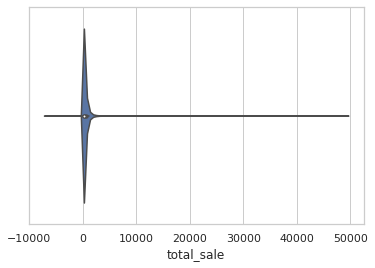

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=merged["total_sale"])

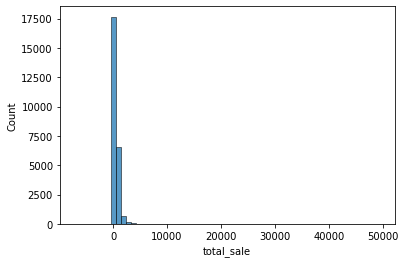

In [ ]:
sns.histplot(data=merged, x="total_sale", bins=60)

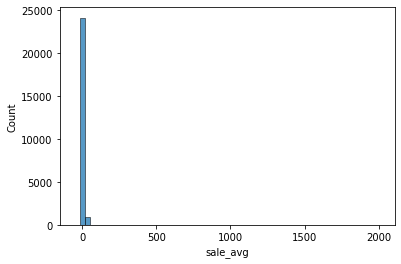

In [ ]:
sns.histplot(data=merged, x="sale_avg", bins=60)

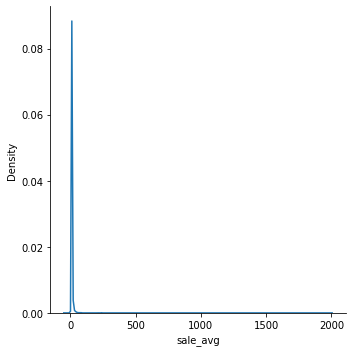

In [ ]:
sns.displot(merged, x="sale_avg", kind="kde", bw_adjust=.25)

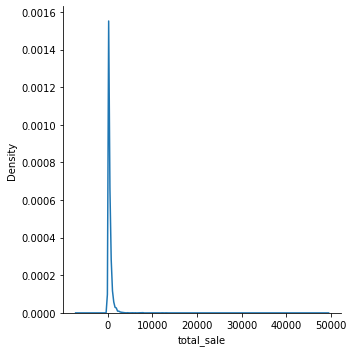

In [ ]:
sns.displot(merged, x="total_sale", kind="kde", bw_adjust=.25)


In [ ]:
details.head()

,Unnamed: 0,CUSTOMER_ID,QUANTITY,LIST_PRICE,SPECIAL,membership_m,0.0,1.0,10.0,11.0,12.0,13.0,15.0,16.0,2.0,3.0,4.0,6.0,7.0,9.0,MEMBER_GET_MEMBER,PHONE,STORE,WEB,fri,mon,sat,sun,thu,tue,wed,weekday,weekend,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,TOTAL_PURCHASE,TOTAL_RETURNED,LIST_PRICE_RETURNED
0,0,BF00404312,1.0,6.85,0,216.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,6.85,NaN,NaN
1,1,BF00404312,1.0,6.25,0,216.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,6.25,NaN,NaN
2,2,BF00404312,1.0,4.95,0,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4.95,NaN,NaN
3,3,BF00404312,1.0,5.25,0,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5.25,NaN,NaN
4,4,BF00404312,1.0,5.95,0,216.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5.95,NaN,NaN


In [10]:
details['TOTAL_PURCHASE_Weekday']=details['TOTAL_PURCHASE'].fillna(0)*details['weekday']
details['TOTAL_PURCHASE_Weekend']=details['TOTAL_PURCHASE'].fillna(0)*details['weekend'] 

In [18]:

details_aggregated = details.groupby('CUSTOMER_ID').agg(
QUANTITY=('QUANTITY','sum')
,LIST_PRICE				=('LIST_PRICE','sum')
,SPECIAL				=('SPECIAL','sum')
,membership_m			=('membership_m','sum')
,cat_0					=('0.0','sum')
,cat_1					=('1.0','sum')
,cat_10					=('10.0','sum')
,cat_11					=('11.0','sum')
,cat_12					=('12.0','sum')
,cat_13					=('13.0','sum')
,cat_15					=('15.0','sum')
,cat_16					=('16.0','sum')
,out_2					=('2.0','sum')
,out_3					=('3.0','sum')
,out_4					=('4.0','sum')
,out_6					=('6.0','sum')
,out_7					=('7.0','sum')
,out_9					=('9.0','sum')
,MEMBER_GET_MEMBER		=('MEMBER_GET_MEMBER','sum')
,PHONE					=('PHONE','sum')
,STORE					=('STORE','sum')
,WEB					=('WEB','sum')
,fri					=('fri','sum')
,mon					=('mon','sum')
,sat					=('sat','sum')
,sun					=('sun','sum')
,thu					=('thu','sum')
,tue					=('tue','sum')
,wed					=('wed','sum')
,weekday				=('weekday','sum')
,weekend				=('weekend','sum')
,apr					=('apr','sum')
,aug					=('aug','sum')
,dec					=('dec','sum')
,feb					=('feb','sum')
,jan					=('jan','sum')
,jul					=('jul','sum')
,jun					=('jun','sum')
,mar					=('mar','sum')
,may					=('may','sum')
,nov					=('nov','sum')
,oct					=('oct','sum')
,sep					=('sep','sum')
,TOTAL_PURCHASE			=('TOTAL_PURCHASE','sum')
,TOTAL_RETURNED			=('TOTAL_RETURNED','sum')
,LIST_PRICE_RETURNED	=('LIST_PRICE_RETURNED','sum')
,TOTAL_PURCHASE_Weekday	=('TOTAL_PURCHASE_Weekday','sum')
,TOTAL_PURCHASE_Weekend	=('TOTAL_PURCHASE_Weekend','sum')

)

details_aggregated.reset_index( inplace=True)

In [23]:
details_aggregated.head()

,CUSTOMER_ID,QUANTITY,LIST_PRICE,SPECIAL,membership_m,cat_0,cat_1,cat_10,cat_11,cat_12,cat_13,cat_15,cat_16,out_2,out_3,out_4,out_6,out_7,out_9,MEMBER_GET_MEMBER,PHONE,STORE,WEB,fri,mon,sat,sun,thu,tue,wed,weekday,weekend,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,TOTAL_PURCHASE,TOTAL_RETURNED,LIST_PRICE_RETURNED,TOTAL_PURCHASE_Weekday,TOTAL_PURCHASE_Weekend
0,AA00312188,50.0,350.10,0,7400.0,0,2,11,3,0,4,0,0,0,3,8,0,7,2,0,0,0,40,0,0,3,0,37,0,0,37,3,0,5,5,0,7,3,0,0,2,3,8,7,435.40,0.0,0.0,407.75,27.65
1,AA00312390,34.0,229.80,0,4234.0,0,4,8,0,0,0,0,0,0,12,1,0,0,4,0,0,0,29,0,0,29,0,0,0,0,0,29,0,5,1,0,2,1,3,0,8,6,2,1,289.50,0.0,0.0,0.00,289.50
2,AA00325975,108.0,746.15,0,20670.0,0,41,11,5,0,0,0,3,0,27,5,2,9,3,0,0,0,106,0,0,106,0,0,0,0,0,106,0,11,14,0,9,6,20,0,17,10,9,10,753.65,-5.0,0.0,0.00,753.65
3,AA00336843,27.0,186.35,0,2075.0,0,2,4,0,0,0,0,0,0,18,0,0,0,1,0,0,0,25,6,0,14,4,0,0,1,7,18,0,6,2,0,4,3,0,0,3,6,1,0,216.95,0.0,0.0,52.65,164.30
4,AA00339761,15.0,127.45,0,3090.0,0,4,7,0,0,0,0,0,0,4,0,0,0,0,0,0,0,15,13,0,0,2,0,0,0,13,2,0,2,0,0,5,0,5,0,0,0,3,0,127.45,0.0,0.0,106.35,21.10
